In [ ]:
'''
Hipoteses
Nome e preço - identificar se palavras específicas tem influência no valor
Bairro_group, Bairro e preco - localidade do apartamento tem influencia no valor
quantidade de dias e localidade - ver locais onde apartamentos ficam disponiveis por mais dias
qtd de dias e numero de avaliaçoes
qtd de dias e valor
minimo noites e avaliaçoes
(checado)preco e avaliacoes - locais mais caros possivelmente tem menos avaliaçoes
'''

In [1]:
import pandas as pd
import seaborn as sns

### Análise inicial

In [ ]:

df = pd.read_csv(r'C:\Users\mhmon\Desktop\indicium\teste_indicium_precificacao.csv')

print(df.info())  
print(df.drop(columns=['id', 'host_id', 'latitude', 'longitude']).describe())


Essa primeira análise serve para obter um panorama geral do dataset, é possível notar a presença de valores nulos, observar a média e outras métricas do dataset, além de ter uma noção dos extremos de cada categoria.

Inicialmente vamos retirar os dados cujo nome do host ou nome da publicação está nula, é ideal ter uma base de dados concisa e completa.

Além disso, locais cuja disponibilidade é 0 serão retirados, pois nossa análise deve se focar em locais possíveis de serem alugados



In [13]:
qtd_zeros = (df['disponibilidade_365'] == 0).sum()
print(qtd_zeros)

17533


In [3]:
df_limpo = df.dropna(subset=['host_name', 'nome'])  # Remove onde 'host_name' e nome são nulos

df_limpo = df_limpo[df_limpo['disponibilidade_365']!=0]
df_limpo

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Além disso, alguns dados considerados outliers tambem serão eliminados nessa etapa inicial, caso o numero de reviews seja 0, e o valor do aluguel seja maior que 2000 (número arbitrário), vamos tirar do conjunto de dados

In [4]:
qtd_ext = (df['price'] >=2000).sum()
df2 = df_limpo[(df_limpo['price'] <= 2000)]
print(qtd_ext)
df2


110


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Agora vamos analisar os dados.


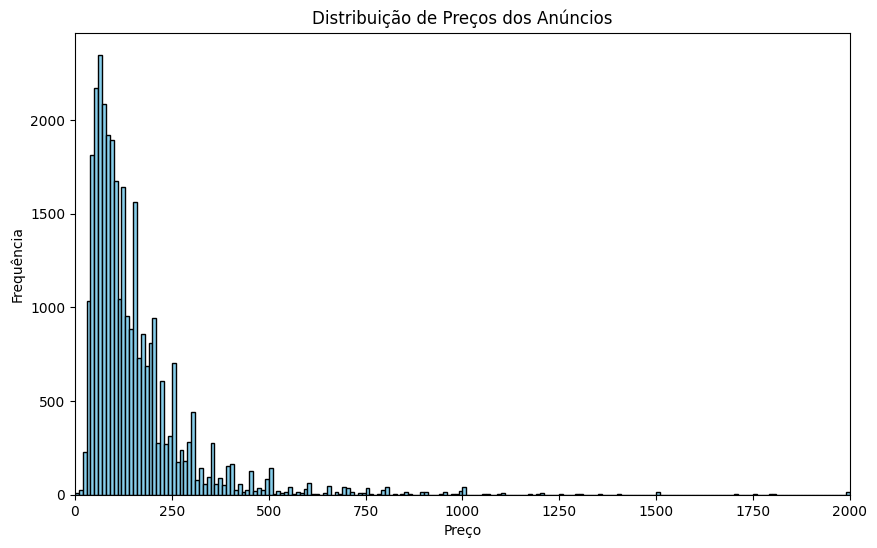

In [5]:
import matplotlib.pyplot as plt
df = df2
columns=['price', 'minimo_noites', 'disponibilidade_365']
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Preço')
plt.ylabel("Frequência")
plt.xlim([0,2000])
plt.title("Distribuição de Preços dos Anúncios")
plt.show()




Podemos ver que a grande maioria dos preços está na faixa dos 50 a 200 dólares, contudo é possível observar valores bem acima da média. Isto pode simbolizar imóveis de locais mais caros e anúncios de Casa/Apartamento

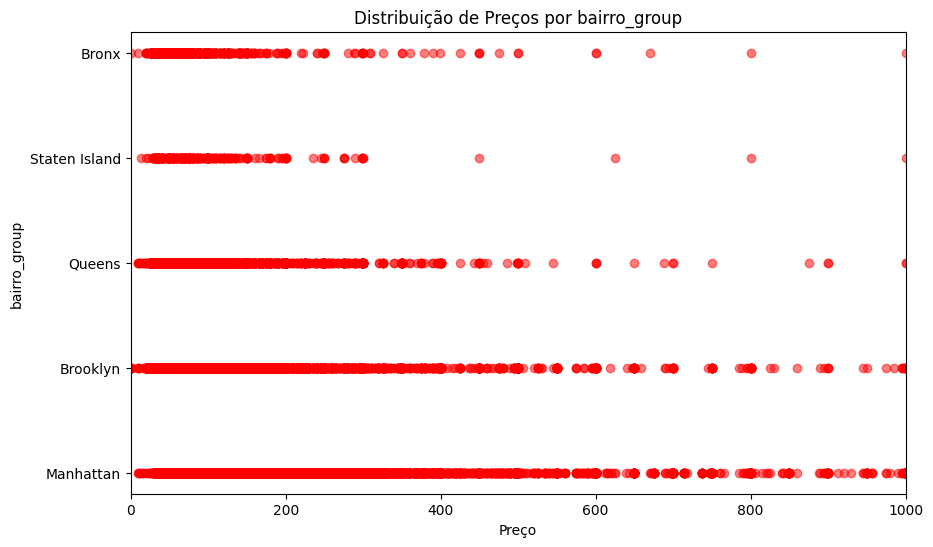

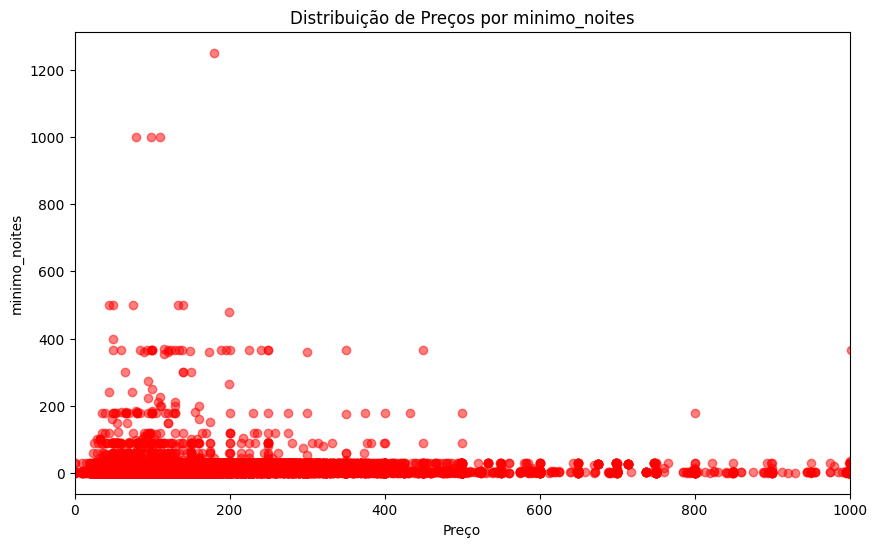

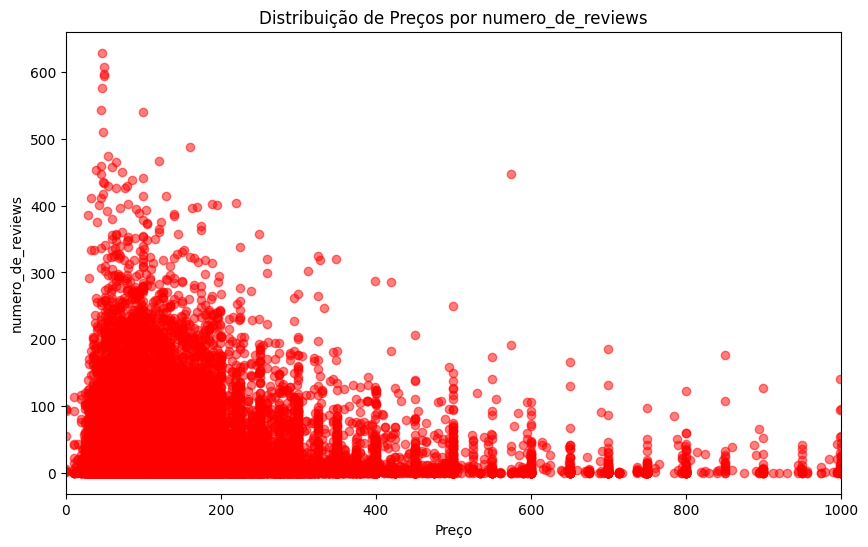

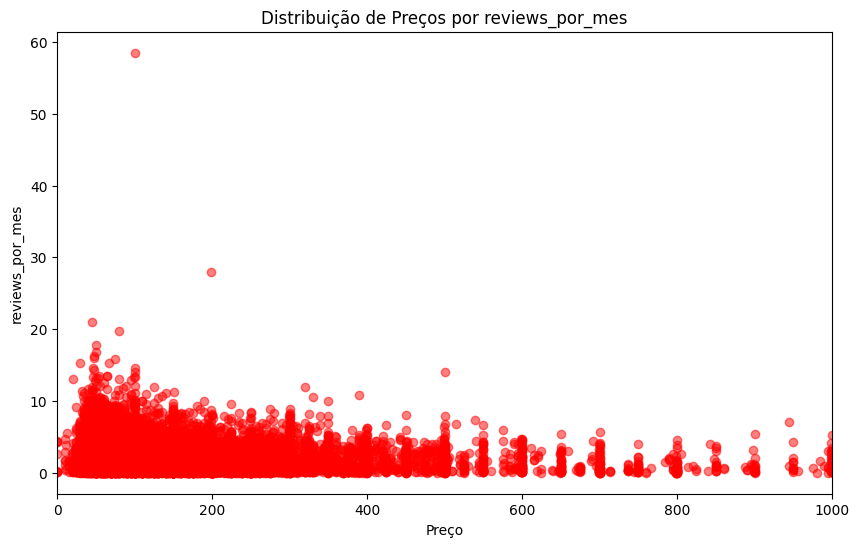

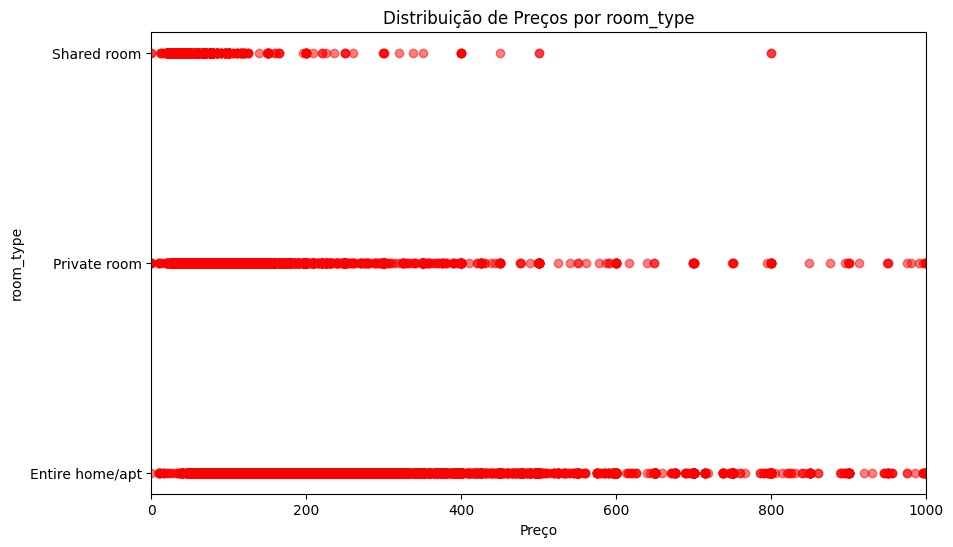

In [64]:
columns = ["bairro_group","minimo_noites","numero_de_reviews","reviews_por_mes", 'room_type']
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.scatter( df['price'],df[column], alpha=0.5, color='red')
    plt.xlim(0, 1000)  # Remover outliers extremos para melhor visualização
    plt.ylabel(column)
    plt.xlabel("Preço")
    plt.title(f"Distribuição de Preços por {column}")
    plt.show()
    

Podemos notar coisas interessantes ao analisar os gráficos acima:

- Bairros como Staten Island e Bronx tem intervalo de valores até certa faixa, o que mostra que apartamentos nesses locais possivelmente serão mais acessíveis. Enquanto Manhattan, por exemplo, apresenta uma linha densa ao decorrer do gráfico, o que mostra que a quantidade de locais com preços acima da média é bem maior.

- O tipo de quarto também afeta o preço, quartos compartilhados apresentam concentração em torno de 150 e tendem a ser mais acessíveis, quartos privados e casas tem valores maiores, contudo os anúncios de Casa/Apartamento podem ter valores bem maiores.

- O número de reviews decresce conforme o preço aumenta, o que mostra que lugares mais acessíveis tem maior número de inquilinos e consequentemente maior número de avaliações

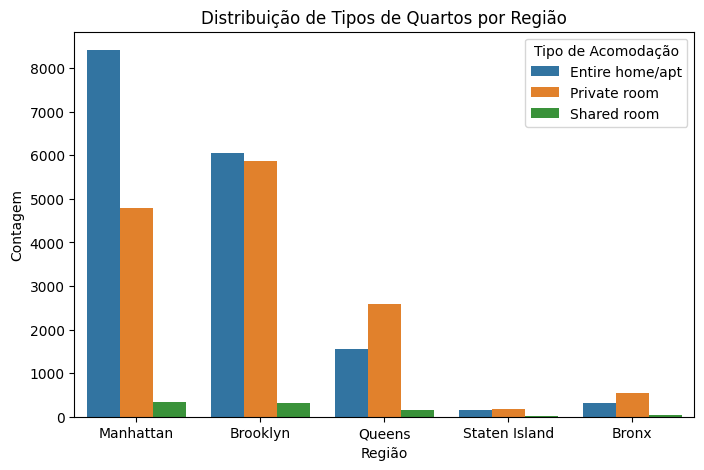

In [65]:

    
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='bairro_group', hue='room_type')
plt.title("Distribuição de Tipos de Quartos por Região")
plt.xlabel("Região")
plt.ylabel("Contagem")
plt.legend(title="Tipo de Acomodação")
plt.show()


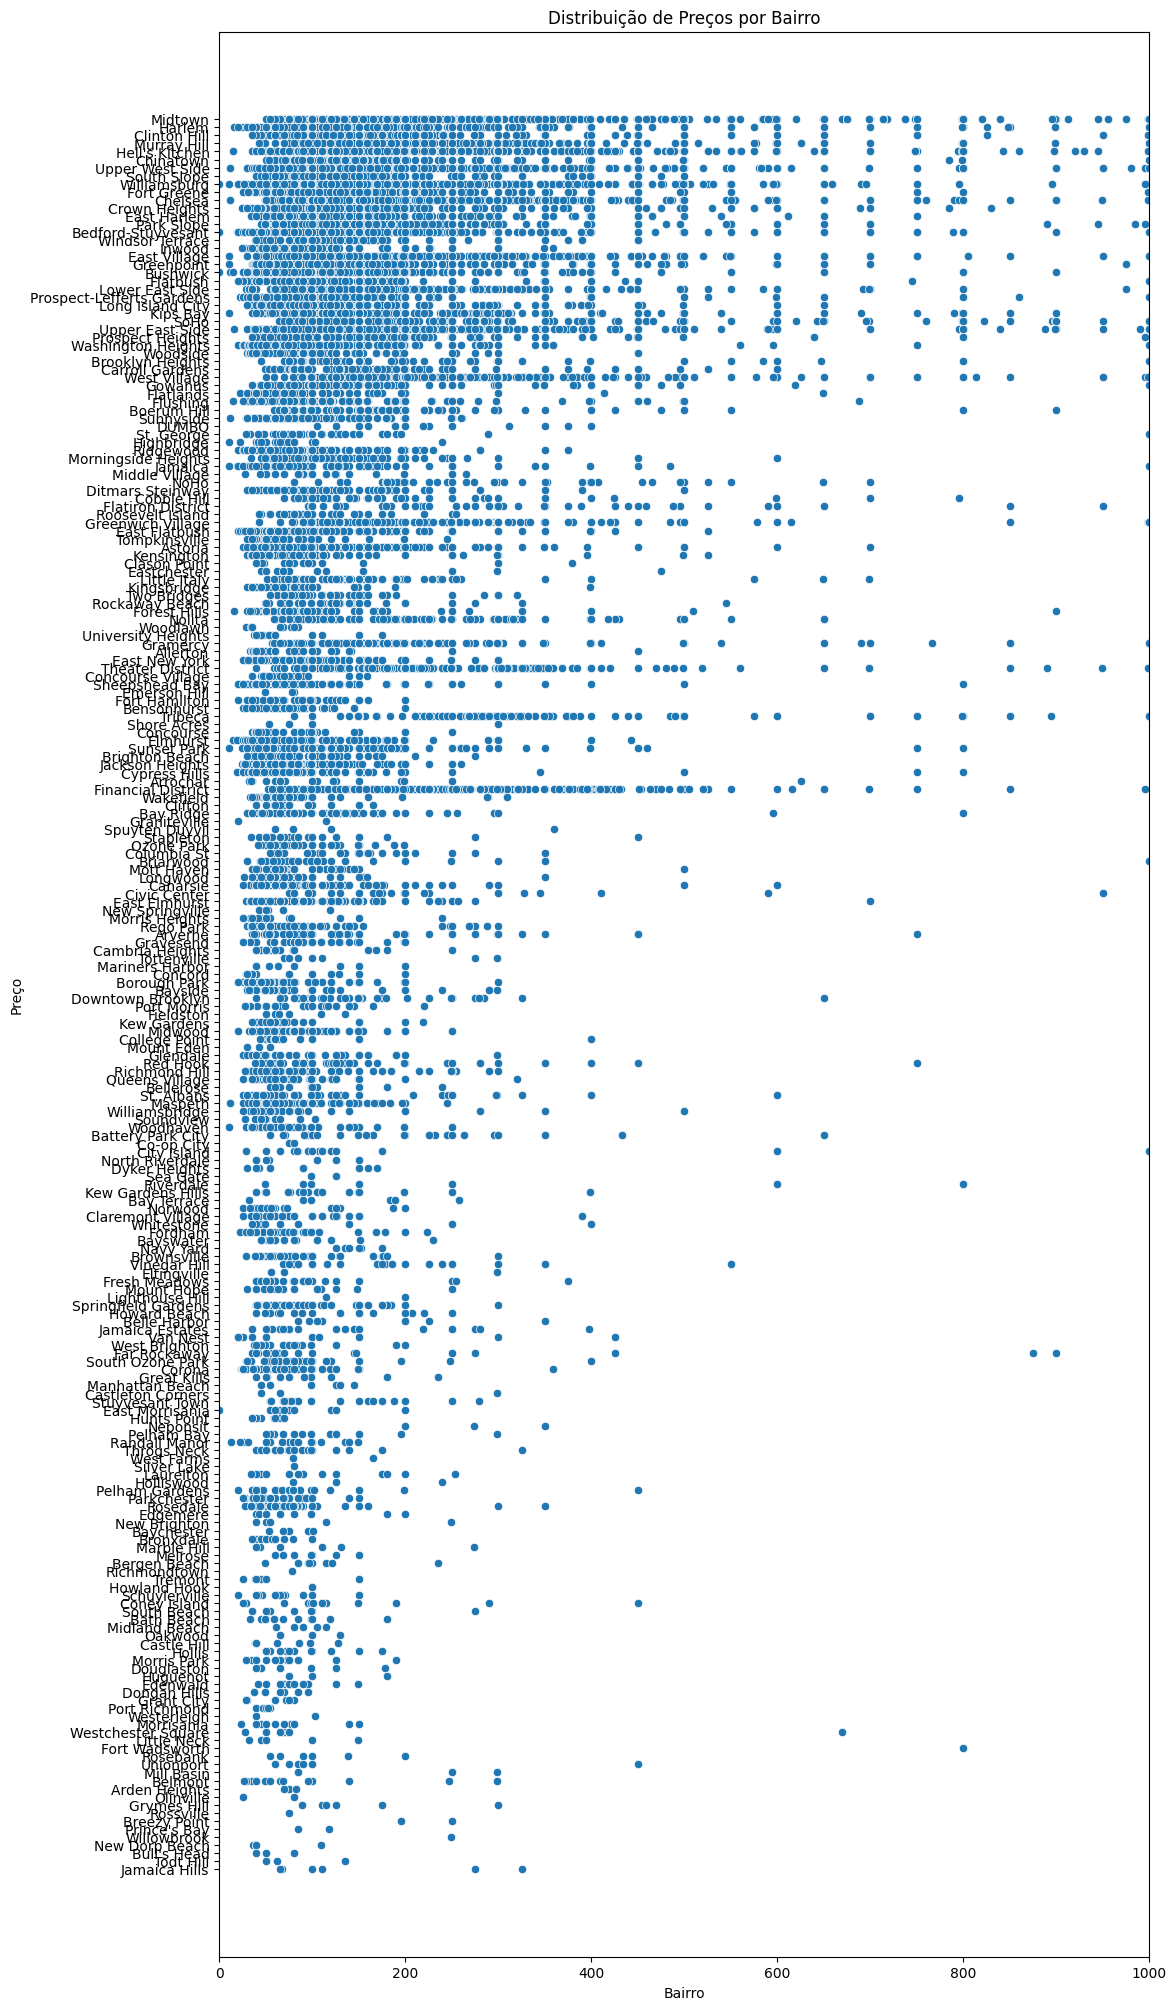

In [303]:
import matplotlib.pyplot as plt
df = df2
plt.figure(figsize=(12,25))
sns.scatterplot(y='bairro', x='price', data=df)
plt.xlim(0,1000)  # Limitar preço para melhor visualização
plt.title('Distribuição de Preços por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.show()




Embora a visualização não seja tão boa, podemos ver que o bairro tem influência grande no preço, sendo um fator importante para a precificação do imóvel

In [66]:
estatisticas = df.groupby("bairro_group")["price"].agg(["count", "mean", "median", "std"]).reset_index()

print(estatisticas)

    bairro_group  count        mean  median         std
0          Bronx    912   88.978070    65.0  112.768054
1       Brooklyn  12246  130.953536    99.0  171.923911
2      Manhattan  13535  207.225711   150.0  254.515814
3         Queens   4296   99.517691    75.0  103.036726
4  Staten Island    330   99.424242    75.0  111.672211


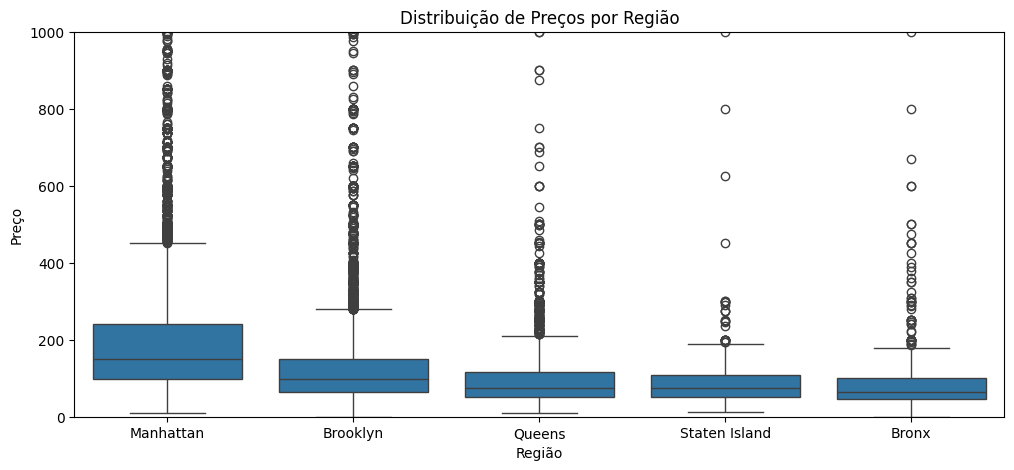

In [31]:

plt.figure(figsize=(12,5))
sns.boxplot(x='bairro_group', y='price', data=df)
plt.ylim(0,1000)  # Limitar preço para melhor visualização
plt.title('Distribuição de Preços por Região')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.show()



A distância do imóvel até o centro de Nova York deve ter impacto direto no preço, provavelmente quanto mais perto maior tende a ser o preço

In [295]:
from geopy.distance import geodesic
df_distance = df2
def calcular_distancia(lat, lon):
    centro = (40.7580, -73.9855)  # Times Square, NY
    return geodesic((lat, lon), centro).km

df_distance['distancia_centro'] = df_distance.apply(lambda row: calcular_distancia(row['latitude'], row['longitude']), axis=1)


C:\Users\mhmon\AppData\Local\Temp\ipykernel_12080\2584319647.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distance['distancia_centro'] = df_distance.apply(lambda row: calcular_distancia(row['latitude'], row['longitude']), axis=1)


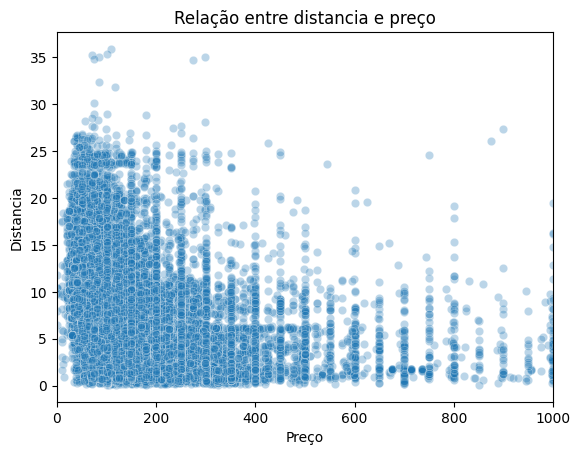

In [296]:
sns.scatterplot(y='distancia_centro', x='price', data=df_distance, alpha=0.3)
plt.xlim(0, 1000) # Remove outliers extremos
plt.title('Relação entre distancia e preço')
plt.xlabel('Preço')
plt.ylabel('Distancia')
plt.show()

Embora muitos valores baixos estejam bem perto do centro, podemos ver que a concentração de valores altos é principalmente em imóveis com pouca distância até o centro

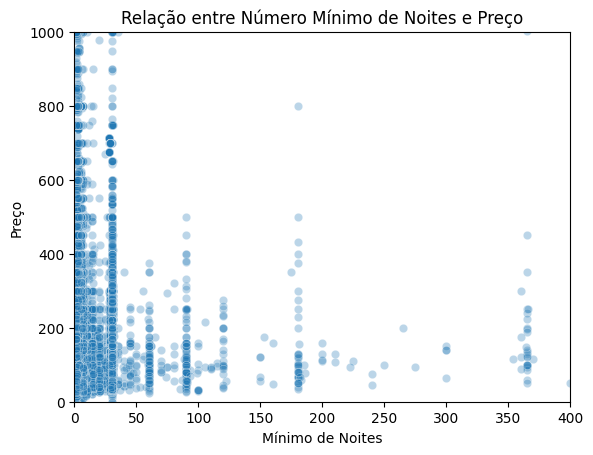

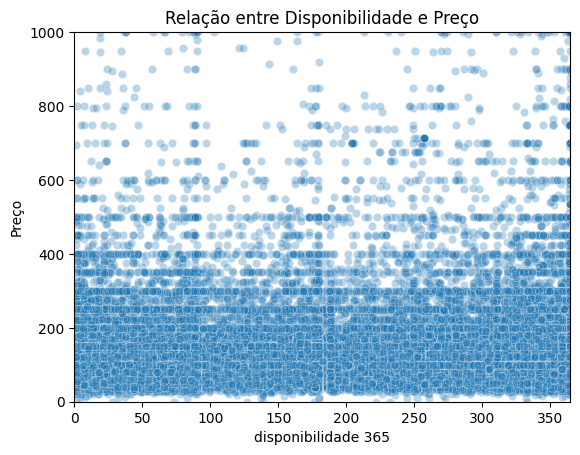

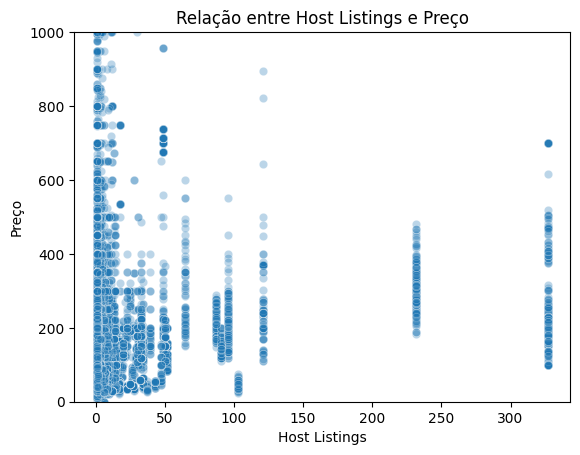

In [298]:
sns.scatterplot(x='minimo_noites', y='price', data=df2, alpha=0.3)
plt.ylim(0, 1000) # Remove outliers extremos
plt.xlim(0, 400) # Remove outliers extremos
plt.title('Relação entre Número Mínimo de Noites e Preço')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.show()
sns.scatterplot(x='disponibilidade_365', y='price', data=df2, alpha=0.3)
plt.ylim(0, 1000) # Remove outliers extremos
plt.xlim(0, 365) # Remove outliers extremos
plt.title('Relação entre Disponibilidade e Preço')
plt.xlabel('disponibilidade 365')
plt.ylabel('Preço')
plt.show()
sns.scatterplot(x='calculado_host_listings_count', y='price', data=df2, alpha=0.3)
plt.ylim(0, 1000) # Remove outliers extremos
plt.title('Relação entre Host Listings e Preço')
plt.xlabel('Host Listings')
plt.ylabel('Preço')
plt.show()



## Resumo da EDA

- O local está diretamente ligado ao preço médio dos imóveis. 
    - Regiões como Manhattan e Brooklyn apresentam maior variabilidade de preços, assim como os preços mais altos, são também as regiões com maior número de imóveis disponíveis.
    - Staten Island e Bronx possuem uma faixa de preços mais limitada, indicando que esses bairros oferecem acomodações mais acessíveis.
    - Manhattan tem uma grande variação de preços e apresenta vários anúncios com valores acima da média, o que pode indicar maior demanda ou exclusividade.
    - O bairro tem influência direta e significativa no preço
    - A distância até o centro também nos permite ter uma noção da variabilidade dos preços, sendo uma feature importante
    

- O tipo de acomodação impacta diretamente o preço
    - Quartos compartilhados giram em torno de 150 USD ou menos, mostrando que são a opção mais acessível.
    - Quartos privados e casas inteiras têm uma distribuição mais ampla de preços, sugerindo que o nível de conforto e privacidade pesa na precificação.
    - Casas inteiras podem ter valores muito altos, pois incluem apartamentos de luxo e propriedades maiores.

-O número de reviews e reviews por mês diminui conforme o preço sobe, indicando que lugares mais acessíveis recebem mais reservas e, consequentemente, mais avaliações. Isso pode significar que preços mais altos atraem um público menor e mais seleto, ou que imóveis mais caros são alugados por períodos mais longos (reduzindo o número total de hóspedes e avaliações).

-O host listings parece ter certa influência em alguns dados, seu uso pode ser útil

-A maioria dos locais não requer um grande número mínimo de noites 

-A disponibilidade ao longo do ano é bem equilibrada



### Extração de palavras
Para verificar correlação entre título e preço vou dividir os dados em categorias, sendo anúncios com preço abaixo de 300 baratos, e acima de 700 caros.
Além disso podemos mostrar na tela a nuvem de palavras que mostra quais termos mais aparecem nas determinadas categorias

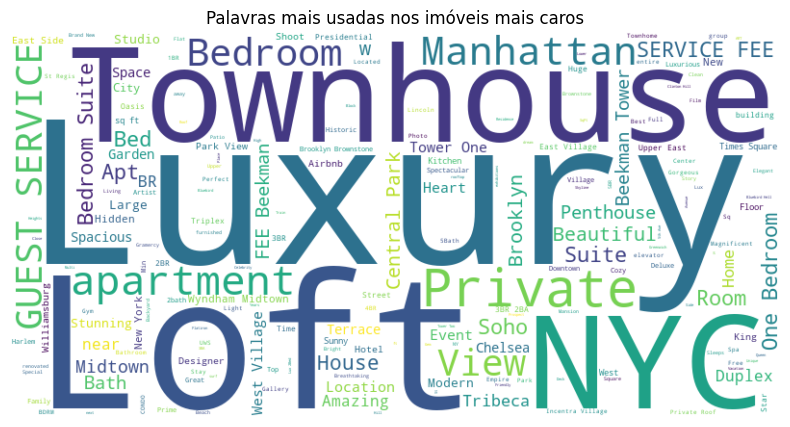

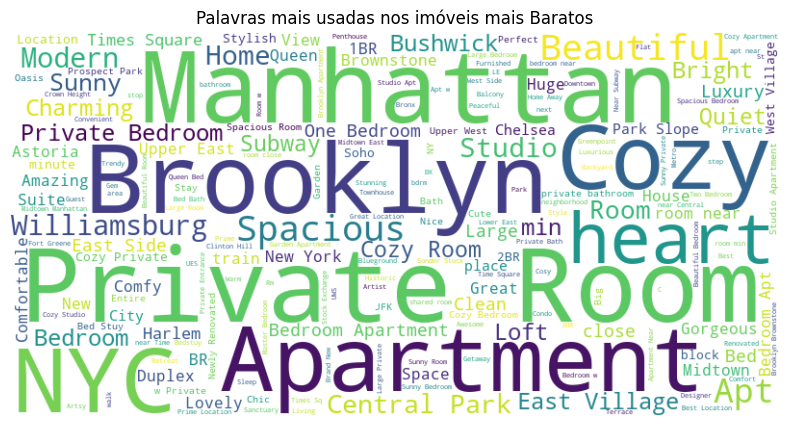

In [45]:
from wordcloud import WordCloud

text = " ".join(df[df['price'] > 700]['nome'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais usadas nos imóveis mais caros")
plt.show()


text = " ".join(df[df['price'] < 300]['nome'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais usadas nos imóveis mais Baratos")
plt.show()


In [43]:
df["categoria_preco"] = pd.cut(df["price"], 
                               bins=[0, 300, 700, float("inf")], 
                               labels=["baixo", "médio", "alto"])


df['categoria_preco'].value_counts()


categoria_preco
baixo    28732
médio     2153
alto       456
Name: count, dtype: int64

In [ ]:
from collections import Counter
import re

ignorar = ["the",  "in", "of", "at", "with", "a", "an", "and", "for", "to", 'from', 'room']

def contar_palavras(lista_nomes):
    palavras = " ".join(lista_nomes).lower()  # Junta tudo e coloca em minúsculas
    palavras = re.sub(r"[^a-z\s]", "", palavras)  # Remove pontuações
    lista_palavras = palavras.split()
    lista_filtrada = [palavra for palavra in lista_palavras if palavra not in ignorar]

    return Counter(lista_filtrada)

nomes_baratos = df[df["categoria_preco"] == "baixo"]["nome"].dropna().tolist()
nomes_caros = df[df["categoria_preco"] == "alto"]["nome"].dropna().tolist()

# Contar palavras mais frequentes
palavras_baratos = contar_palavras(nomes_baratos)
palavras_caros = contar_palavras(nomes_caros)
# Mostrar as 10 palavras mais comuns
print("Palavras comuns em locais baratos:", palavras_baratos.most_common(10))
print("Palavras comuns em locais caros:", palavras_caros.most_common(10))


Palavras comuns em locais baratos: [('private', 4583), ('bedroom', 4343), ('apartment', 3617), ('cozy', 3026), ('apt', 2512), ('studio', 2347), ('brooklyn', 2341), ('manhattan', 2279), ('br', 1980), ('spacious', 1879)]
Palavras comuns em locais caros: [('bedroom', 72), ('luxury', 64), ('loft', 50), ('townhouse', 43), ('suite', 43), ('private', 42), ('br', 42), ('nyc', 38), ('village', 32), ('park', 32)]


## Perguntas

### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

A melhor região para investir depende do objetivo do investidor:

    Alto retorno financeiro (preço alto por noite) → Manhattan

    Os preços médios são os mais altos.
    Boa ocupação devido à demanda turística.
    No entanto, a concorrência parece bem maior, sendo ela a região com maior número de anúncios

    Equilíbrio entre preço e ocupação → Brooklyn ou Queens
    Preços intermediários, contudo Queens tem média de preço menos que Brooklyn e menos concorrência
    Boa disponibilidade, menos saturado que Manhattan.

    Investimento de longo prazo e ocupação contínua → Bronx ou Staten Island
    Preços mais baixos (custo inicial menor) e baixa concorrência
    Possível retorno mais lento por baixa demanda nesses locais

### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
    Não parece ter uma relação direta entre o número mínimo de noites e disponibilidade_365 com o preço do imóvel como visto nos gráficos acima

### Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    Sim! Locais com preço acima de $700 (valor arbitrário), apresentam palavras como 'luxury', 'loft', 'townhouse', 'village', 'suite', que são indicadoras de locais mais luxuosos e de preço maior

## Preparação para modelo de previsão

Antes de pensar no modelo de previsão, algumas modificações serão realizaads no dataset:

1.Removeremos anúncios cuja última review ocorreu antes de 2018, se queremos prever com exatidão os preços desses imóveis o ideal é que o valor esteja condizente com a situação da economia atual

2.Dados como latitude, longitude, id, host_id, nome e parecidos não serão diretamente utilizados para o treinamento

3.Remoção de Outliers de preços muito altos ou muito baixos 

4.Room Type será convertido para One-Hot Encoding (Entire home/apt, Private room, Shared room).

In [379]:
import pandas as pd

data_limite = "2018-01-01"
df = df2
# Converter para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])


df_filtrado = df[(df['ultima_review'] > data_limite) | (df['ultima_review'].isnull())]
df_filtrado


C:\Users\mhmon\AppData\Local\Temp\ipykernel_12080\4207024467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ultima_review'] = pd.to_datetime(df['ultima_review'])


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,distancia_centro
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.507861
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,6.756122
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,8.378165
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1.449890
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,0.766642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,9.322191
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,7.644383
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,7.027094
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,0.477676


Aqui vamos realizar mais operações no dataset:

- Valores nulos em numero de reviews e reviews por mês serão substituídos por 0
- Colunas que não serão utilizadas serão removidas
- Outliers serão removidos
- Como há muitos bairros, vamos criar colunas no dataset contendo medidas de preços desses bairros, assim diminuimos sua cardinalidade e ainda temos informações úteis
- Vamos utilizar a distância ao centro como feature para treinamento
- Bairro Group e Room Type serão convertidos de variáveis categóricas para One Hot Encoding para utilizar no treinamento

In [380]:

df = df_filtrado
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)
df = df.drop(columns=['id', 'nome', 'host_id', 'host_name', 'latitude', 'longitude', 'ultima_review', "minimo_noites"])
# Remoção de Outliers
df = df[df['numero_de_reviews']< 300]
df = df[df['price']< 1000]

# Adição de média e desvio padrão ao dataset
df["media_preco_bairro"] = df.groupby("bairro_group")["price"].transform("mean")
df["desvio_preco_bairro"] = df.groupby("bairro_group")["price"].transform("std")
df = df.drop(columns=['bairro'])

# Adição de distância ao centro ao dataset
df['distancia_centro'] = df_distance.apply(lambda row: calcular_distancia(row['latitude'], row['longitude']), axis=1)

df = pd.get_dummies(df, columns=['room_type', 'bairro_group'], drop_first=False)
df.to_csv(r'C:\Users\mhmon\Desktop\indicium\dataset.csv', index=False, encoding='utf-8')  # Salvar como CSV

df.columns

C:\Users\mhmon\AppData\Local\Temp\ipykernel_12080\1046455743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)


Index(['price', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365',
       'distancia_centro', 'media_preco_bairro', 'desvio_preco_bairro',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island'],
      dtype='object')

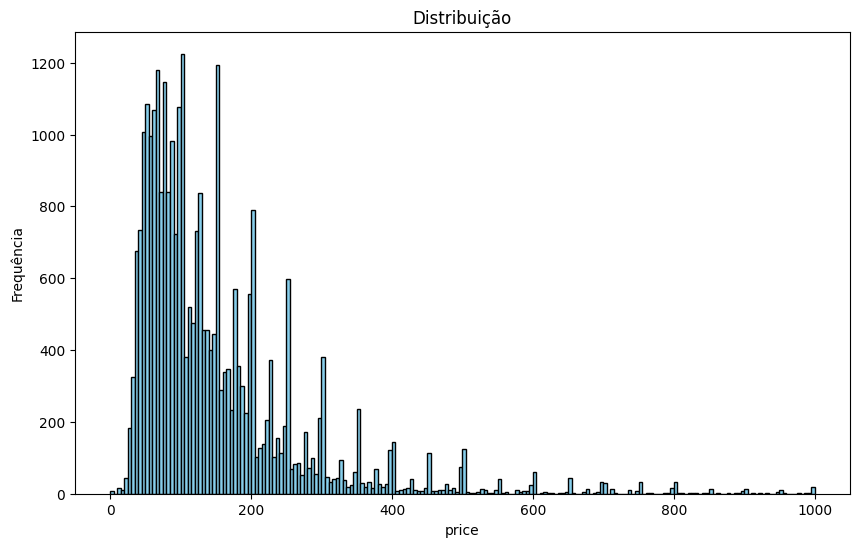

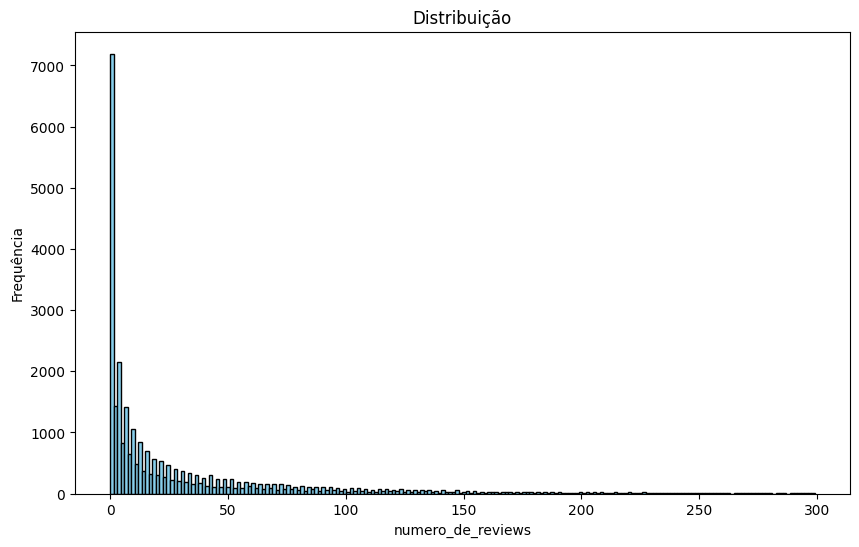

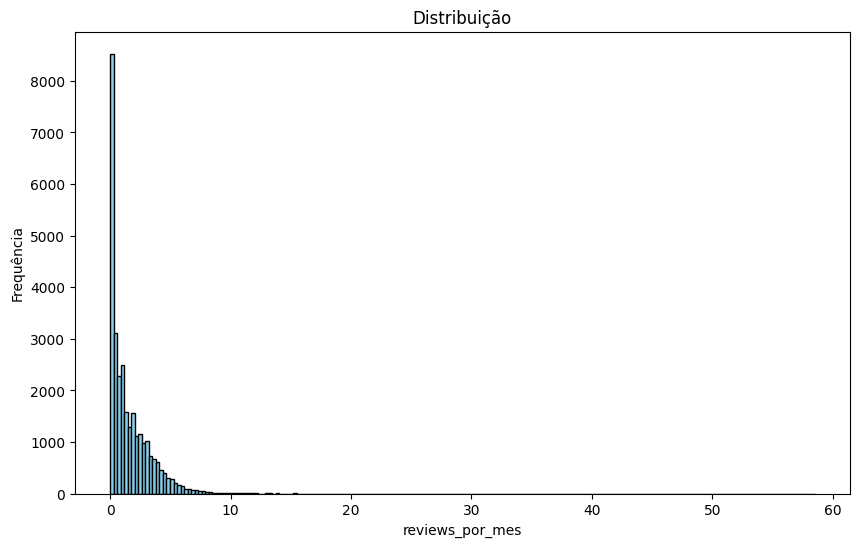

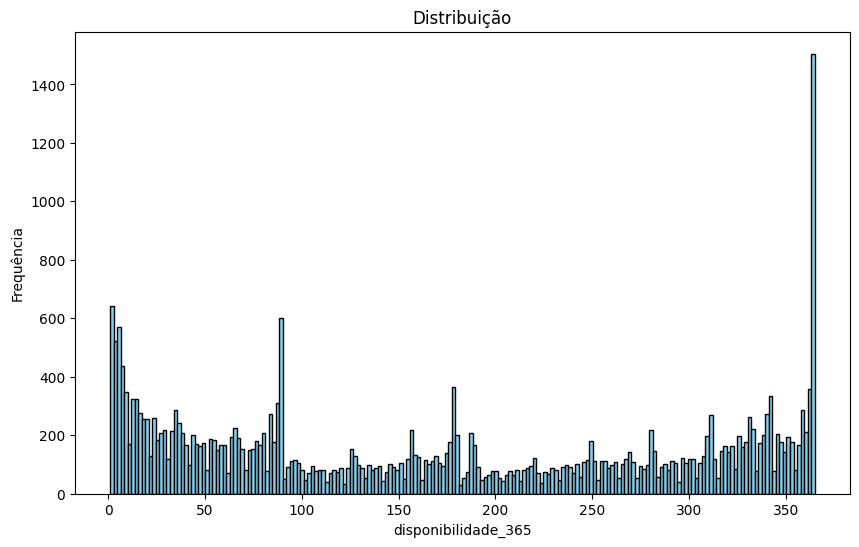

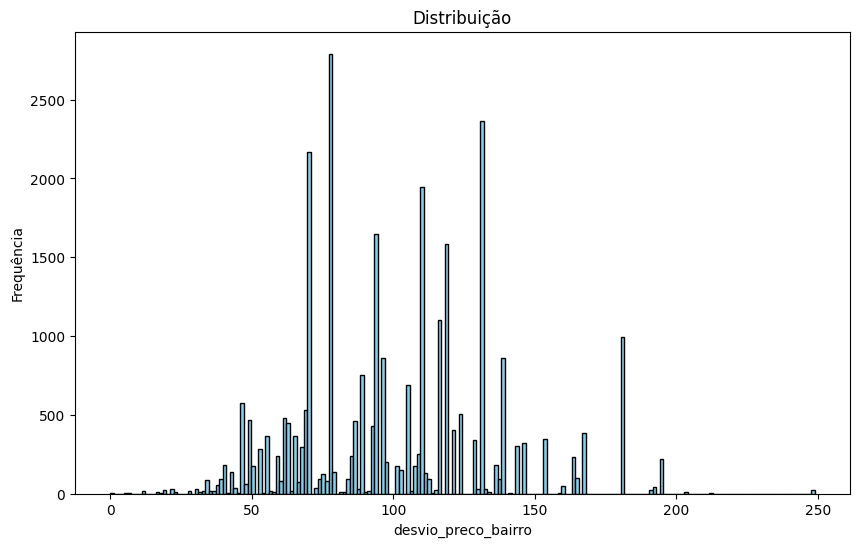

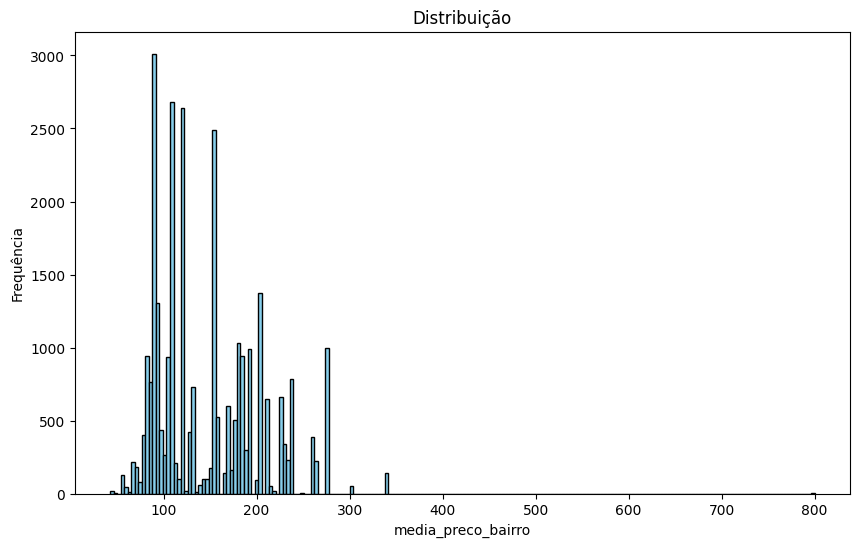

In [355]:
import matplotlib.pyplot as plt
# Ver frequencia de colunas nunméricas
cols = ['price', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365','desvio_preco_bairro',"media_preco_bairro"]
for column in cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=200, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.title("Distribuição")
    plt.show()


Agora vamos reduzir o tamanho do dataset, a discrepância na quantidade de dados pode prejudicar nosso treinamento

In [381]:
import numpy as np
# Reduzir quantidade de dados cujo numero de reviews é menor ou igual a 1
df_review_0 = df[(df['numero_de_reviews'] <=1) & (df['reviews_por_mes'] <=1)]
df_sem_0 = df[(df['numero_de_reviews'] >1) | (df['reviews_por_mes']>1 )]
df_reduzido = df_review_0.sample(n=300, random_state=42)
df_under = pd.concat([df_reduzido, df_sem_0])

# Dividir preços em categorias e reduzir apenas categorias específicas 
df_preco_baixo = df_under[(df_under['price'] <=100)]
df_preco_medio = df_under[(df_under['price'] >100) & (df['price'] <=200)]
df_preco_alto = df_under[(df_under['price'] >200)]
# print(df_preco_baixo.describe())
# print(df_preco_medio.describe())
# print(df_preco_ALTO.describe())
df_reduzido1 = df_preco_baixo.sample(n=9000, random_state=42)
df_reduzido2 = df_preco_medio.sample(n=7500, random_state=42)

df_under = pd.concat([df_reduzido1,df_reduzido2,df_preco_alto])


# Normalizar host_listings para que a variância do valor não prejudique treinamento

df_under["calculado_host_listings_count"] = np.log1p(df_under["calculado_host_listings_count"])
df_under["reviews_por_mes"] = np.log1p(df_under["reviews_por_mes"])
df_under["numero_de_reviews"] = np.log1p(df_under["numero_de_reviews"])
df_under = df_under.drop(columns=["disponibilidade_365"])
df_under.describe()


C:\Users\mhmon\AppData\Local\Temp\ipykernel_12080\855905362.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_preco_medio = df_under[(df_under['price'] >100) & (df['price'] <=200)]


,price,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,distancia_centro,media_preco_bairro,desvio_preco_bairro
count,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000
mean,147.283482,3.046083,0.933504,1.137216,7.546108,146.883322,111.282133
std,116.023061,1.236861,0.547041,0.814391,4.735593,38.551307,25.061856
min,0.000000,0.000000,0.000000,0.693147,0.072383,85.162712,70.528392
25%,70.000000,2.079442,0.457425,0.693147,4.034757,124.271136,99.054471
50%,119.000000,3.044522,0.924259,0.693147,7.102127,124.271136,99.054471
75%,181.000000,4.043051,1.355835,1.386294,9.890215,190.417715,138.757992
max,999.000000,5.703782,4.085976,5.793014,35.065376,190.417715,138.757992


## Treinamento dos Modelos

Testei 4 tipos de modelo:
- Rede Neural com TensorFlow
- XGBRegressor
- GradientBoostingRegressor
- Ensembler combinando XGB e GradientBoost

In [382]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

# Criando cópia do dataset para evitar modificar o original
df_ml = df_under.copy()
df_ml = df_ml.dropna()
# Separando variáveis independentes (X) e alvo (y)
X = df_ml.drop(columns=['price'])
y = df_ml['price']

# Dividindo dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificando apenas colunas numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o normalizador
scaler = StandardScaler()

# Aplicando normalização **apenas às colunas numéricas**
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Exibindo tamanho dos datasets
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")




Tamanho do conjunto de treino: (16181, 14)
Tamanho do conjunto de teste: (4046, 14)


In [359]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [383]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Saída contínua
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred_keras = model.predict(X_test)
# Avaliação do modelo de Regressão Linear
mse_keras = mean_squared_error(y_test, y_pred_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print(f"Regressão KERAS - MSE: {mse_keras:.2f}, R²: {r2_keras:.4f}")

Epoch 1/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21061.4766 - mae: 96.8458 - val_loss: 7801.8296 - val_mae: 53.9365
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9083.3564 - mae: 56.0769 - val_loss: 7758.6050 - val_mae: 52.2135
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9198.5947 - mae: 55.7981 - val_loss: 7701.7910 - val_mae: 50.6236
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8875.1562 - mae: 55.6485 - val_loss: 7716.3408 - val_mae: 54.3248
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8196.7354 - mae: 53.9091 - val_loss: 7761.8145 - val_mae: 55.7335
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9029.9082 - mae: 56.1668 - val_loss: 7627.3682 - val_mae: 52.2023
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9054.4111 - mae: 55.4497 - val_loss: 7573.0688 - val_mae: 51.6767
Epoch 8/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8913.7227 - mae: 55.4341 - val_loss: 7691.1694 - val_mae:

In [384]:
# Treinando o modelo XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
y_pred_xb = xgb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_xb)
r2_gb = r2_score(y_test, y_pred_xb)
print(f"XGB - MSE: {mse_gb:.2f}, R²: {r2_gb:.4f}")


XGB - MSE: 7359.37, R²: 0.4141


In [387]:
# Treinando o modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_gb = gb_model.predict(X_test)

# Avaliação do modelo Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.4f}")

Gradient Boosting - MSE: 7289.60, R²: 0.4196


In [399]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])
ensemble.fit(X_train, y_train)
y_pred_e = ensemble.predict(X_test)
mse_e = mean_squared_error(y_test, y_pred_e)
r2_e = r2_score(y_test, y_pred_e)
print(f"Essemble - MSE: {mse_e:.2f}, R²: {r2_e:.4f}")

Essemble - MSE: 7245.45, R²: 0.4231


### Plotando os Valores reais e estimados

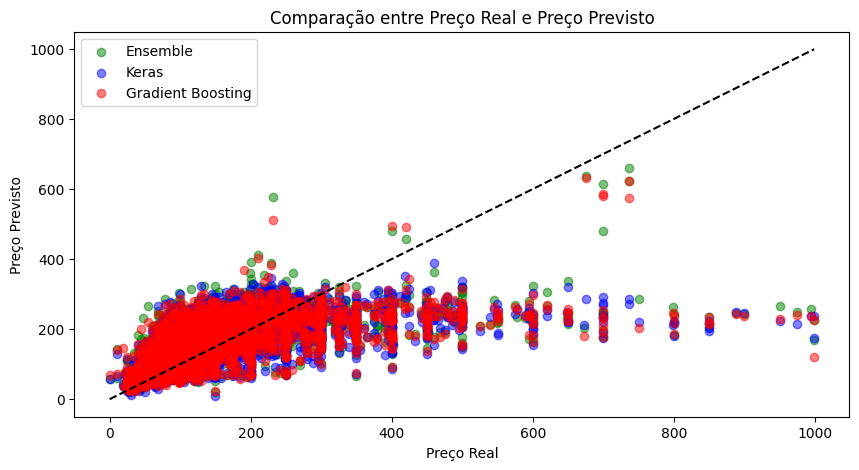

In [389]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_e, alpha=0.5, label="Ensemble", color='green')
plt.scatter(y_test, y_pred_keras, alpha=0.5, label="Keras", color='blue')
plt.scatter(y_test, y_pred_gb, alpha=0.5, label="Gradient Boosting", color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='dashed')
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.legend()
plt.title("Comparação entre Preço Real e Preço Previsto")
plt.show()


## Perguntas Modelo
Variáveis Usadas:numero_de_reviews, reviews_por_mes,calculado_host_listings_count,media_preco_bairro,desvio_padrao,	distancia_centro, room_type, bairro_group

### Por que utilizei?
- Utilizei apenas variáveis numéricas com influência direta no preço
- As Variáveis categóricas utilizadas também tinham impacto direto no preço
- Adição de média e desvio padrão no dataset melhorou o desempenho do modelo
- Adição da distância até o centro melhorou o desempenho do modelo
  
### Qual tipo de problema estamos resolvendo (regressão, classificação)?
Estamos resolvendo um problema de regressão, pois o objetivo é prever um valor numérico contínuo, o preço.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
O modelo que melhor se aproximou foi o modelo VotingRegressor, que combina os modelos GradientBoosting e XBG , tendo o melhor valor de MSE e R2, embora os resultados não tenham sido satisfatórios, a capacidade de generalização deixa a desejar e o valor de perda é extremamente alto. Infelizmente não cheguei no resultado almejado a tempo 

### Qual medida de performance do modelo foi escolhida e por quê?
Foi utilizado o MSE e R2, foram escolhidas pois seus valores permitem analisar o desempenho do modelo de forma satisfatória, assim como sua capacidade de explicar a variabilidade dos dados


### Previsão de Apartamento sugerido

In [390]:
# Ver features associadas a Mahanttan
filtro = df[df['bairro_group_Manhattan'] == 1]

filtro


,price,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,distancia_centro,media_preco_bairro,desvio_preco_bairro,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,225,45,0.38,2,355,0.507861,190.417715,138.757992,True,False,False,False,False,True,False,False
1,150,0,0.00,1,365,6.756122,190.417715,138.757992,False,True,False,False,False,True,False,False
4,200,74,0.59,1,129,1.449890,190.417715,138.757992,True,False,False,False,False,True,False,False
8,150,160,1.33,4,188,4.965404,190.417715,138.757992,True,False,False,False,False,True,False,False
9,135,53,0.43,1,6,5.292900,190.417715,138.757992,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48885,200,0,0.00,1,176,1.565449,190.417715,138.757992,True,False,False,False,False,True,False,False
48887,125,0,0.00,1,31,0.847275,190.417715,138.757992,False,True,False,False,False,True,False,False
48891,115,0,0.00,1,27,7.027094,190.417715,138.757992,True,False,False,False,False,True,False,False
48892,55,0,0.00,6,2,0.477676,190.417715,138.757992,False,False,True,False,False,True,False,False


In [ ]:
import pandas as pd

# Dados do apartamento
apt = {
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 }


# Transformar categorias
df_apt = pd.DataFrame([apt])
# Adição de distância ao centro ao dataset
df_apt['distancia_centro'] = df_apt.apply(lambda row: calcular_distancia(row['latitude'], row['longitude']), axis=1)

df_apt["media_preco_bairro"] = 190.417715
df_apt["desvio_preco_bairro"] = 138.757992
# One-Hot Encoding 
df_apt['room_type_Entire home/apt'] = 1 if df_apt['room_type'][0] == 'Entire home/apt' else 0
df_apt['room_type_Private room'] = 1 if df_apt['room_type'][0] == 'Private room' else 0
df_apt['room_type_Shared room'] = 1 if df_apt['room_type'][0] == 'Shared room' else 0

df_apt['bairro_group_Bronx'] = 1 if df_apt['bairro_group'][0] == 'Bronx' else 0
df_apt['bairro_group_Brooklyn'] = 1 if df_apt['bairro_group'][0] == 'Brooklyn' else 0
df_apt['bairro_group_Manhattan'] = 1 if df_apt['bairro_group'][0] == 'Manhattan' else 0
df_apt['bairro_group_Queens'] = 1 if df_apt['bairro_group'][0] == 'Queens' else 0
df_apt['bairro_group_Staten Island'] = 1 if df_apt['bairro_group'][0] == 'Staten Island' else 0

# Normalização do host listings
df_apt["calculado_host_listings_count"] = np.log1p(df_apt["calculado_host_listings_count"])


df_apt = df_apt.drop(columns=['latitude', 'longitude','bairro', 'bairro_group','ultima_review', 'room_type'])

df_apt



,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,distancia_centro,media_preco_bairro,desvio_preco_bairro,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,45,0.38,1.098612,0.507861,190.417715,138.757992,1,0,0,0,0,1,0,0


In [ ]:
valor = ensemble.predict(df_apt)

print(f'O valor previsto foi ${round(valor[0])}')


O valor previsto foi 143


In [421]:
import joblib
joblib.dump(ensemble, 'modelo_treinado.pkl')


['modelo_treinado.pkl']